1) What are the main motivations for reducing a dataset’s dimensionality?
What are the main drawbacks?
>The main motivations for dimensionality reduction are:
To speed up a subsequent training algorithm (in some cases it may even remove noise and redundant features, making the training algorithm perform better)
To visualize the data and gain insights on the most important features
To save space (compression)

>The main drawbacks are:
Some information is lost, possibly degrading the performance of subsequent training algorithms.
It can be computationally intensive.
It adds some complexity to your Machine Learning pipelines.
Transformed features are often hard to interpret.

2)  What is the curse of dimensionality?
> The curse of dimensionality refers to the fact that many problems that do not exist in low-dimensional space arise in high-dimensional space. In Machine Learning, one common manifestation is the fact that randomly sampled high-dimensional vectors are generally far from one another, increasing the risk of overfitting and making it very difficult to identify patterns without having plenty of training data.

3)  Once a dataset’s dimensionality has been reduced, is it possible to
reverse the operation? If so, how? If not, why?
> Once a dataset's dimensionality has been reduced using one of the algorithms we discussed, it is almost always impossible to perfectly reverse the operation, because some information gets lost during dimensionality reduction. Moreover, while some algorithms (such as PCA) have a simple reverse transformation procedure that can reconstruct a dataset relatively similar to the original, other algorithms (such as t-SNE) do not.

4) Can PCA be used to reduce the dimensionality of a highly nonlinear
dataset?
> PCA can be used to significantly reduce the dimensionality of most datasets, even if they are highly nonlinear, because it can at least get rid of useless dimensions. However, if there are no useless dimensions—as in the Swiss roll dataset—then reducing dimensionality with PCA will lose too much information. You want to unroll the Swiss roll, not squash it.


5)  Suppose you perform PCA on a 1,000-dimensional dataset, setting the
explained variance ratio to 95%. How many dimensions will the
resulting dataset have?
>That's a trick question: it depends on the dataset. Let's look at two extreme examples. First, suppose the dataset is composed of points that are almost perfectly aligned. In this case, PCA can reduce the dataset down to just one dimension while still preserving 95% of the variance. Now imagine that the dataset is composed of perfectly random points, scattered all around the 1,000 dimensions. In this case roughly 950 dimensions are required to preserve 95% of the variance. So the answer is, it depends on the dataset, and it could be any number between 1 and 950. Plotting the explained variance as a function of the number of dimensions is one way to get a rough idea of the dataset's intrinsic dimensionality.

6)  In what cases would you use regular PCA, incremental PCA,
randomized PCA, or random projection?
>Regular PCA is the default, but it works only if the dataset fits in memory. Incremental PCA is useful for large datasets that don't fit in memory, but it is slower than regular PCA, so if the dataset fits in memory you should prefer regular PCA. Incremental PCA is also useful for online tasks, when you need to apply PCA on the fly, every time a new instance arrives. Randomized PCA is useful when you want to considerably reduce dimensionality and the dataset fits in memory; in this case, it is much faster than regular PCA. Finally, Random Projection is great for very high-dimensional datasets.

7) How can you evaluate the performance of a dimensionality reduction
algorithm on your dataset?
>Intuitively, a dimensionality reduction algorithm performs well if it eliminates a lot of dimensions from the dataset without losing too much information. One way to measure this is to apply the reverse transformation and measure the reconstruction error. However, not all dimensionality reduction algorithms provide a reverse transformation. Alternatively, if you are using dimensionality reduction as a preprocessing step before another Machine Learning algorithm (e.g., a Random Forest classifier), then you can simply measure the performance of that second algorithm; if dimensionality reduction did not lose too much information, then the algorithm should perform just as well as when using the original dataset.

8) Does it make any sense to chain two different dimensionality reduction
algorithms?
> It can absolutely make sense to chain two different dimensionality reduction algorithms. A common example is using PCA or Random Projection to quickly get rid of a large number of useless dimensions, then applying another much slower dimensionality reduction algorithm, such as LLE. This two-step approach will likely yield roughly the same performance as using LLE only, but in a fraction of the time.


9) 9. Load the MNIST dataset (introduced in Chapter 3) and split it into a
training set and a test set (take the first 60,000 instances for training,
and the remaining 10,000 for testing). Train a random forest classifier
on the dataset and time how long it takes, then evaluate the resulting
model on the test set. Next, use PCA to reduce the dataset’s
dimensionality, with an explained variance ratio of 95%. Train a new
random forest classifier on the reduced dataset and see how long it
takes. Was training much faster? Next, evaluate the classifier on the
test set. How does it compare to the previous classifier? Try again with
an SGDClassifier. How much does PCA help now?

In [2]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784',version=1)

X_train = mnist.data[:60000]
y_train = mnist.target[:60000]

X_test = mnist.data[60000:]
y_test = mnist.target[60000:]

In [3]:
from sklearn.ensemble import RandomForestClassifier
rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf.fit(X_train,y_train)

CPU times: total: 41 s
Wall time: 41.2 s


RandomForestClassifier(random_state=42)

In [4]:
from sklearn.metrics import accuracy_score

y_pred = y_pred = rnd_clf.predict(X_test)
accuracy_score(y_test, y_pred)


0.9705

In [5]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)
X_train_reduced = pca.fit_transform(X_train)

rnd_clf_with_pca = RandomForestClassifier(n_estimators=100, random_state=42)
%time rnd_clf_with_pca.fit(X_train_reduced, y_train)

"""Oh no! Training is actually about twice slower now! How can that be? Well, as we saw in this chapter, dimensionality reduction does not always lead to faster training time: 
it depends on the dataset, the model and the training algorithm. See figure 8-6 (the manifold_decision_boundary_plot* plots above). If you try SGDClassifier instead of RandomForestClassifier,
 you will find that training time is reduced by a factor of 3 when using PCA. Actually, we will do this in a second,
 but first let's check the precision of the new random forest classifier."""

CPU times: total: 1min 58s
Wall time: 1min 58s


RandomForestClassifier(random_state=42)

In [ ]:
X_test_reduced = pca.transform(X_test)

y_pred = rnd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

"""It is common for performance to drop slightly when reducing dimensionality, because we do lose some potentially useful signal in the process.
However, the performance drop is rather severe in this case. So PCA really did not help: it slowed down training and reduced performance. 😭"""

0.9488

In [8]:
from sklearn.linear_model import SGDClassifier

sgd_clf = SGDClassifier(random_state=42)
%time sgd_clf.fit(X_train, y_train)

CPU times: total: 2min 2s
Wall time: 2min 3s


SGDClassifier(random_state=42)

In [ ]:
y_pred = sgd_clf.predict(X_test)
accuracy_score(y_test, y_pred)

"""Okay, so the SGDClassifier takes much longer to train on this dataset than the RandomForestClassifier, plus it performs worse on the test set. 
But that's not what we are interested in right now, we want to see how much PCA can help SGDClassifier.
 Let's train it using the reduced dataset:"""

0.874

In [11]:
sgd_clf_with_pca = SGDClassifier(random_state=42)
%time sgd_clf_with_pca.fit(X_train_reduced, y_train)

"""Nice! Reducing dimensionality led to roughly 5× speedup. :) Let's check the model's accuracy"""

CPU times: total: 28.9 s
Wall time: 29 s


SGDClassifier(random_state=42)

In [12]:
y_pred = sgd_clf_with_pca.predict(X_test_reduced)
accuracy_score(y_test, y_pred)

"""Great! PCA not only gave us a 5× speed boost, it also improved performance slightly."""

0.8959

10) Use t-SNE to reduce the first 5,000 images of the MNIST dataset
down to 2 dimensions and plot the result using Matplotlib. You can use
a scatterplot using 10 different colors to represent each image’s target
class. Alternatively, you can replace each dot in the scatterplot with the
corresponding instance’s class (a digit from 0 to 9), or even plot
scaled-down versions of the digit images themselves (if you plot all
digits the visualization will be too cluttered, so you should either draw
a random sample or plot an instance only if no other instance has
already been plotted at a close distance). You should get a nice
visualization with well-separated clusters of digits. Try using other
dimensionality reduction algorithms, such as PCA, LLE, or MDS, and
compare the resulting visualizations.


In [13]:
X_sample, y_sample = X_train[:5000], y_train[:5000]

In [14]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, init="random", learning_rate="auto",
            random_state=42)
%time X_reduced = tsne.fit_transform(X_sample)

CPU times: total: 1min 39s
Wall time: 17.6 s


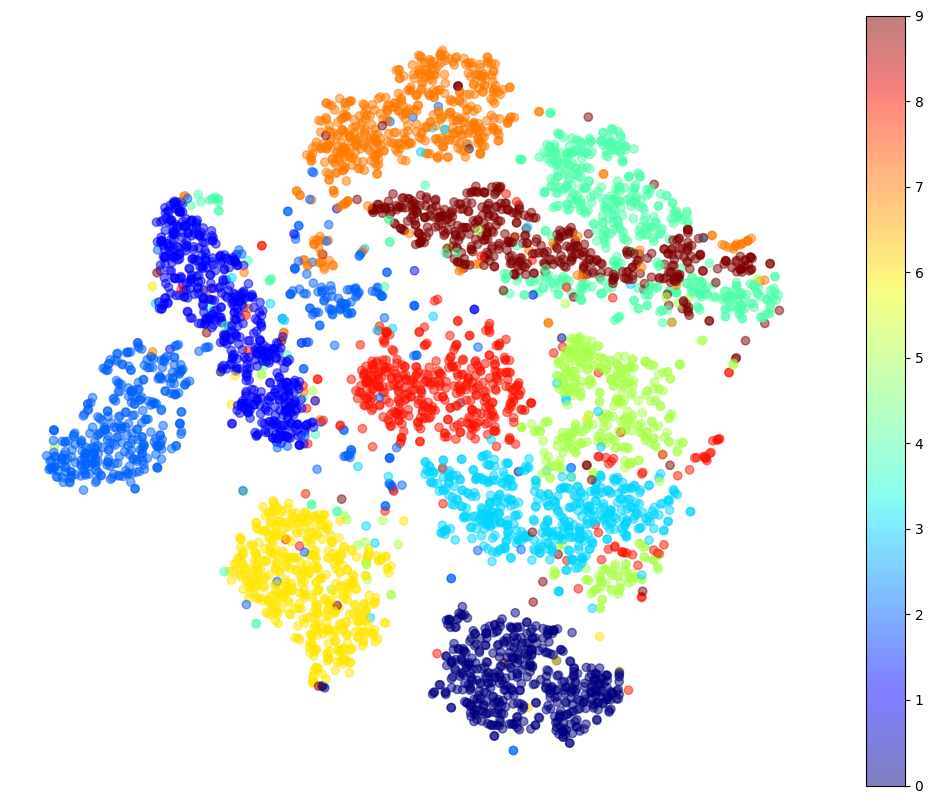

In [15]:
import matplotlib.pyplot as plt
import numpy as np
plt.figure(figsize=(13, 10))
plt.scatter(X_reduced[:, 0], X_reduced[:, 1],
            c=y_sample.astype(np.int8), cmap="jet", alpha=0.5)
plt.axis('off')
plt.colorbar()
plt.show()

"""Isn't this just beautiful? :) Most digits are nicely separated from the others, even though t-SNE wasn't given the targets: 
it just identified clusters of similar images. But there is still a bit of overlap. For example,
 the 3s and the 5s overlap a lot (on the right side of the plot), and so do the 4s and the 9s (in the top-right corner)."""

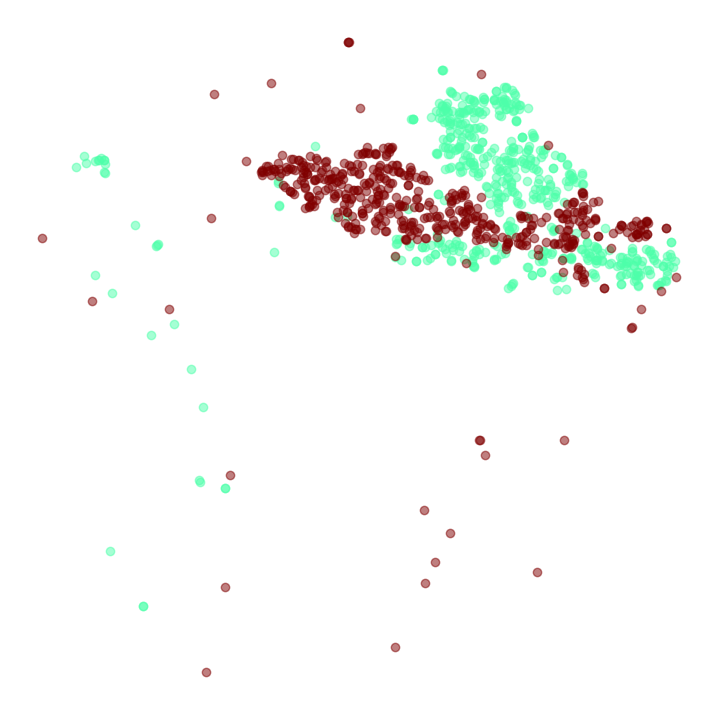

In [16]:
# let's focus on just the digits 4 & 9
plt.figure(figsize=(9, 9))
cmap = plt.cm.jet
for digit in ('4', '9'):
    plt.scatter(X_reduced[y_sample == digit, 0], X_reduced[y_sample == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

In [17]:
# Let's see if we can produce a nicer image by running t-SNE on just these 2 digits:
idx = (y_sample == '4') | (y_sample == '9')
X_subset = X_sample[idx]
y_subset = y_sample[idx]

tsne_subset = TSNE(n_components=2, init="random", learning_rate="auto",
                   random_state=42)
X_subset_reduced = tsne_subset.fit_transform(X_subset)

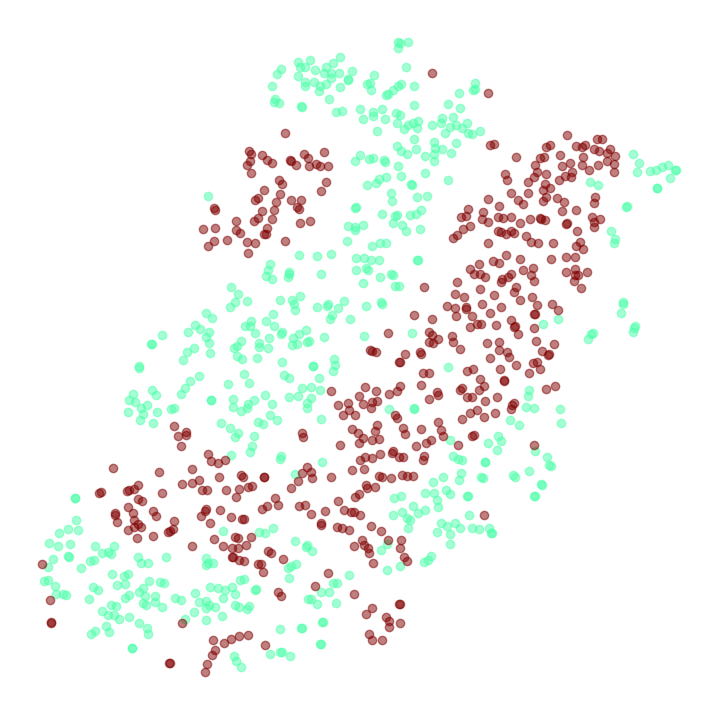

In [18]:
plt.figure(figsize=(9, 9))
for digit in ('4', '9'):
    plt.scatter(X_subset_reduced[y_subset == digit, 0],
                X_subset_reduced[y_subset == digit, 1],
                c=[cmap(float(digit) / 9)], alpha=0.5)
plt.axis('off')
plt.show()

"""That's much better, although there's still a bit of overlap. Perhaps some 4s really do look like 9s, and vice versa. 
It would be nice if we could visualize a few digits from each region of this plot, to understand what's going on. In fact, let's do that now."""

In [19]:
"""Let's create a plot_digits() function that will draw a scatterplot (similar to the above scatterplots) plus write colored digits, 
with a minimum distance guaranteed between these digits. If the digit images are provided, they are plotted instead.
 This implementation was inspired from one of Scikit-Learn's excellent examples (plot_lle_digits, based on a different digit dataset)."""
from sklearn.preprocessing import MinMaxScaler
from matplotlib.offsetbox import AnnotationBbox, OffsetImage

def plot_digits(X, y, min_distance=0.04, images=None, figsize=(13, 10)):
    # Let's scale the input features so that they range from 0 to 1
    X_normalized = MinMaxScaler().fit_transform(X)
    # Now we create the list of coordinates of the digits plotted so far.
    # We pretend that one is already plotted far away at the start, to
    # avoid `if` statements in the loop below
    neighbors = np.array([[10., 10.]])
    # The rest should be self-explanatory
    plt.figure(figsize=figsize)
    cmap = plt.cm.jet
    digits = np.unique(y)
    for digit in digits:
        plt.scatter(X_normalized[y == digit, 0], X_normalized[y == digit, 1],
                    c=[cmap(float(digit) / 9)], alpha=0.5)
    plt.axis("off")
    ax = plt.gca()  # get current axes
    for index, image_coord in enumerate(X_normalized):
        closest_distance = np.linalg.norm(neighbors - image_coord, axis=1).min()
        if closest_distance > min_distance:
            neighbors = np.r_[neighbors, [image_coord]]
            if images is None:
                plt.text(image_coord[0], image_coord[1], str(int(y[index])),
                         color=cmap(float(y[index]) / 9),
                         fontdict={"weight": "bold", "size": 16})
            else:
                image = images[index].reshape(28, 28)
                imagebox = AnnotationBbox(OffsetImage(image, cmap="binary"),
                                          image_coord)
                ax.add_artist(imagebox)


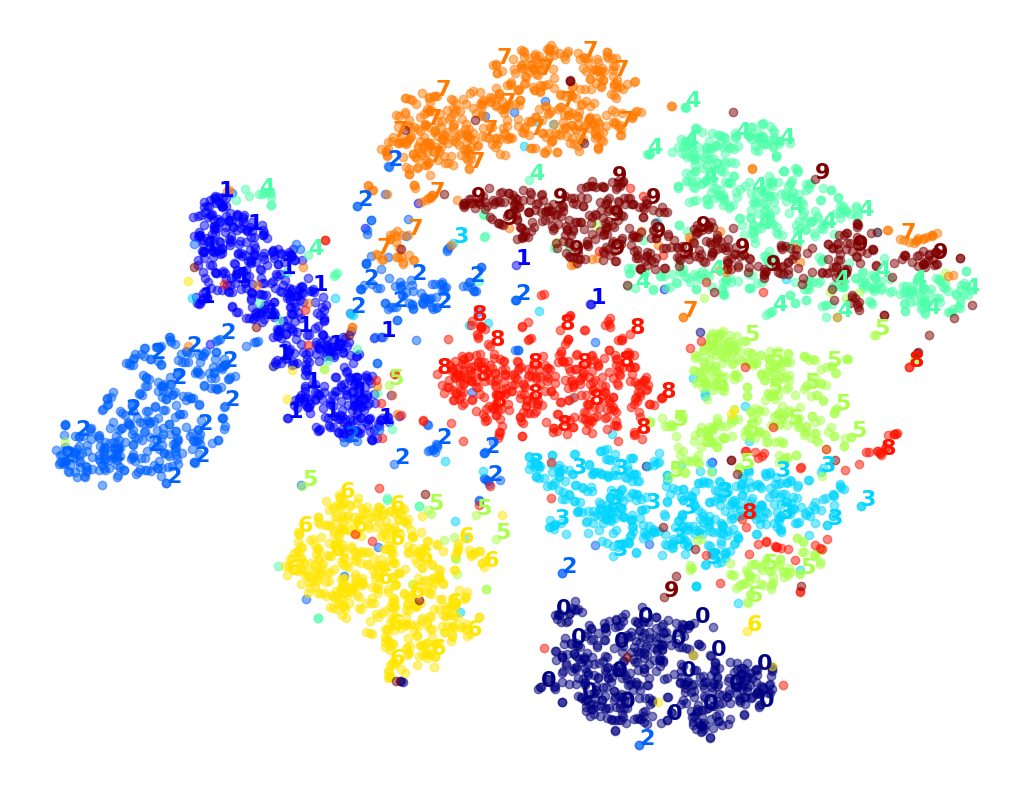

In [30]:
# Let's try it! First let's show colored digits (not images), for all 5,000 images:
plot_digits(X_reduced, y_sample)

In [33]:
X_sample_np = X_sample.to_numpy()

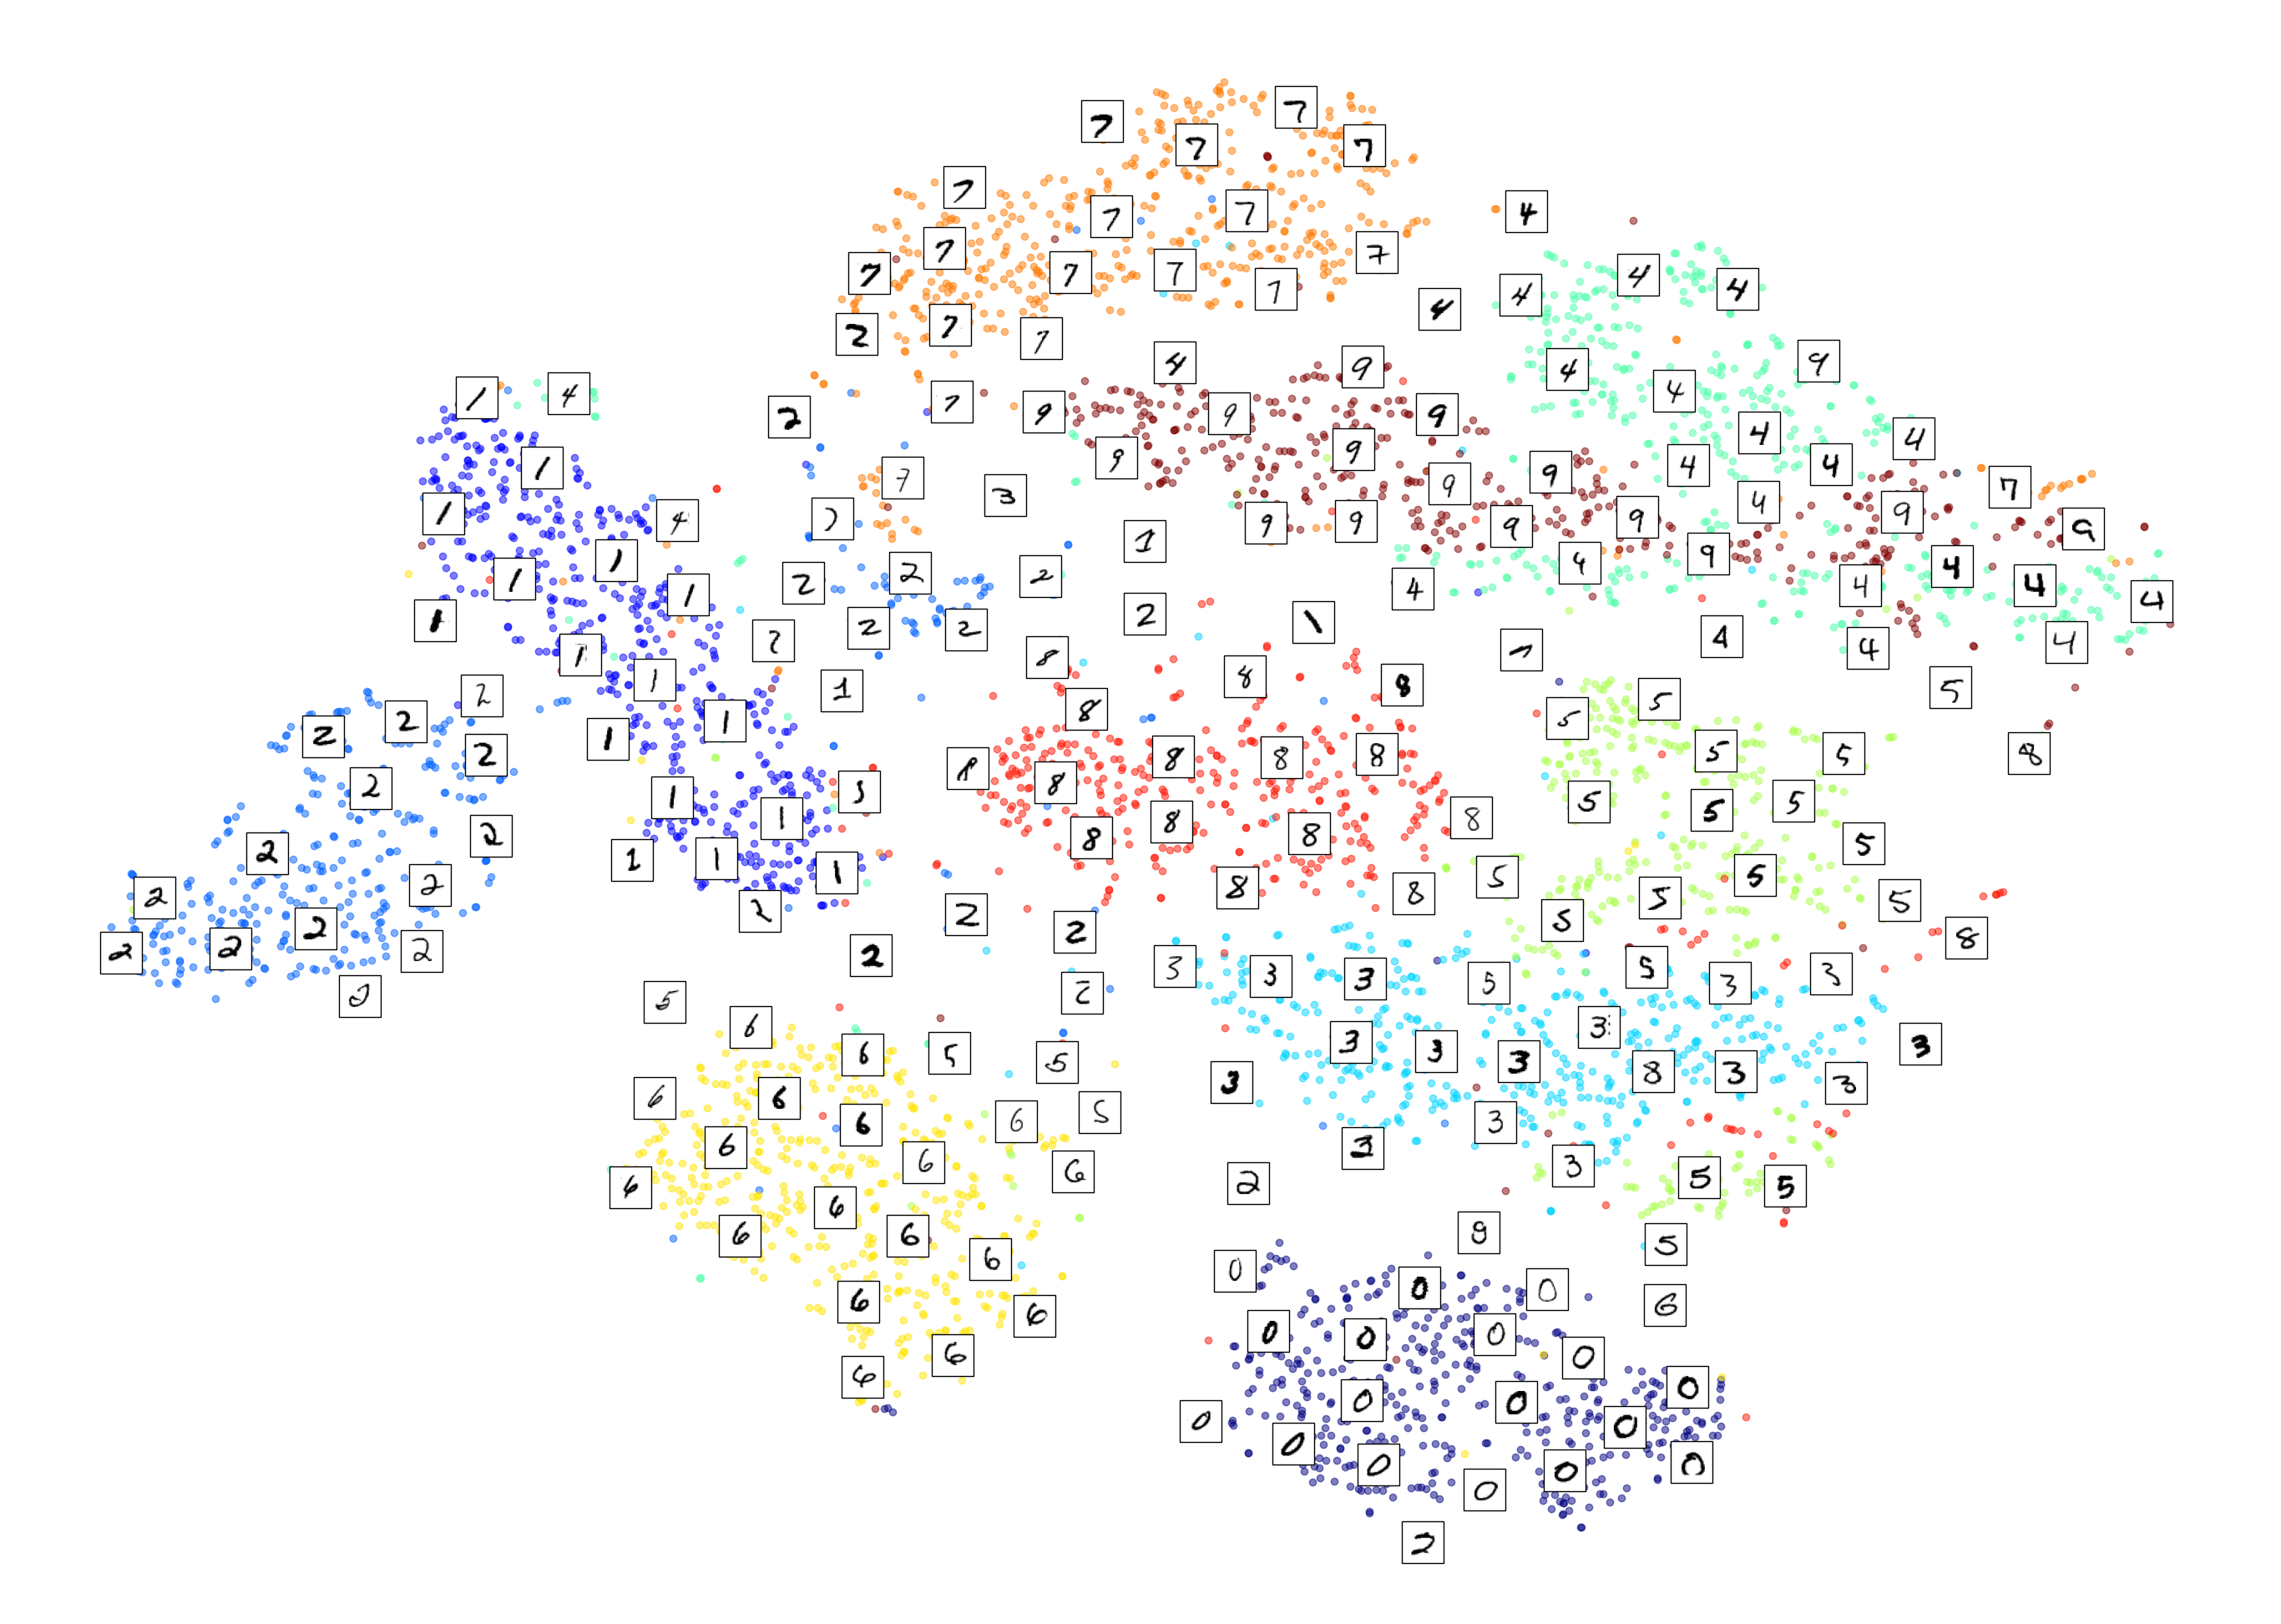

In [34]:
plot_digits(X_reduced, y_sample, images=X_sample_np, figsize=(35, 25))

In [35]:
X_subset_np = X_subset.to_numpy()

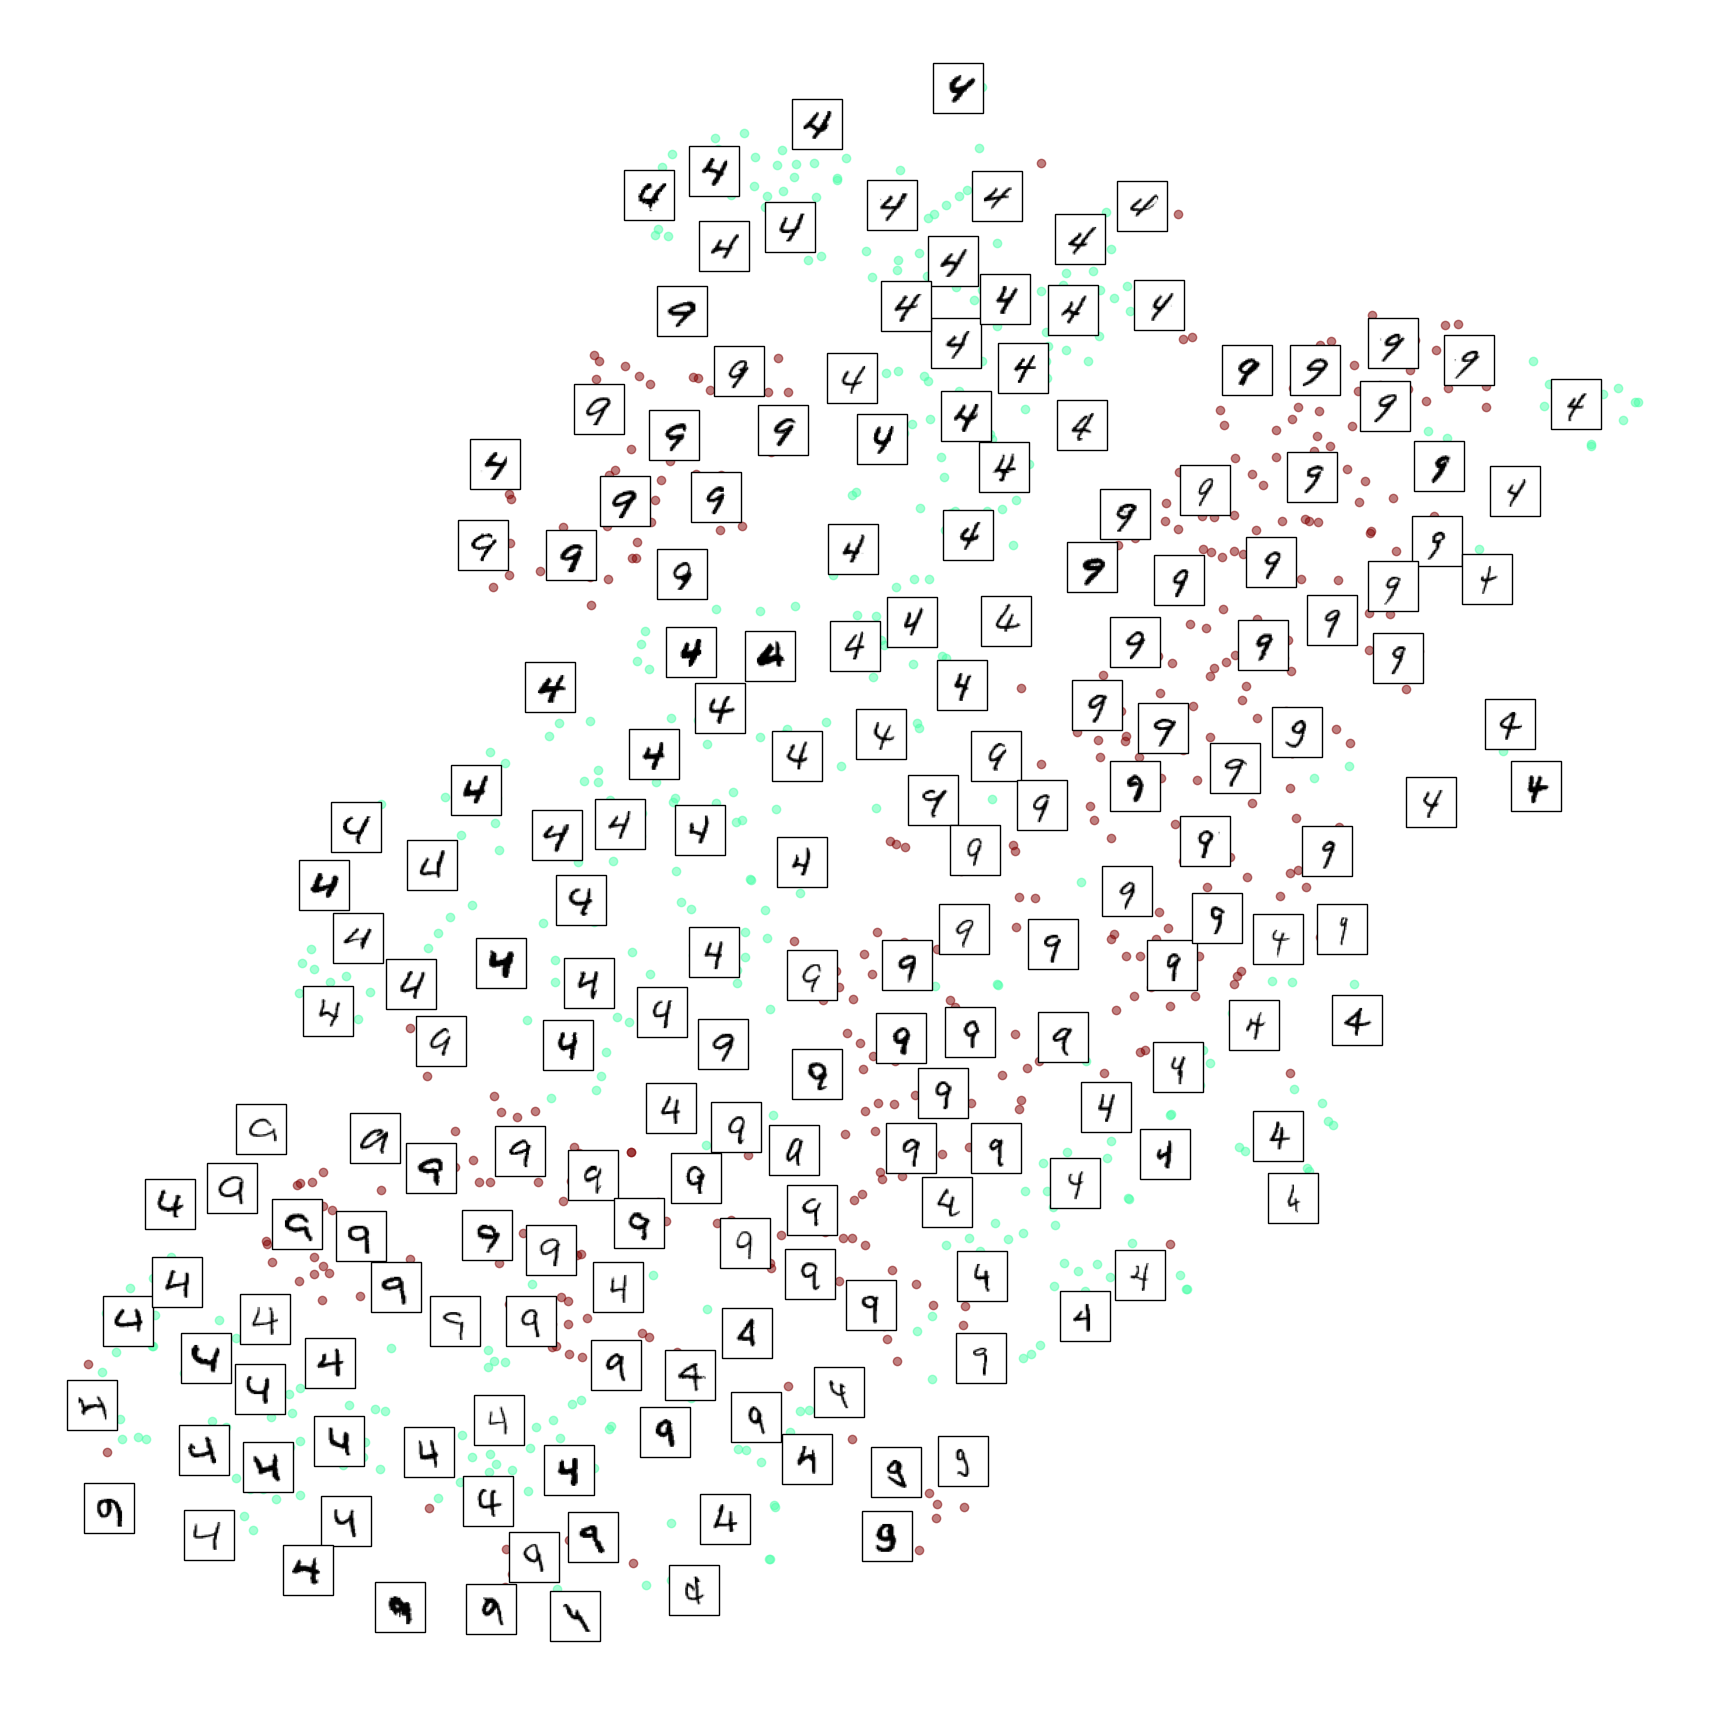

In [36]:

# That's nicer! Now let's focus on just the 3s and the 5s:
plot_digits(X_subset_reduced, y_subset, images=X_subset_np, figsize=(22, 22))
"""Notice how similar-looking 4s are grouped together. For example, the 4s get more and more inclined as they approach the top of the figure.
 The inclined 9s are also closer to the top. Some 4s really do look like 9s, and vice versa."""

CPU times: total: 672 ms
Wall time: 247 ms


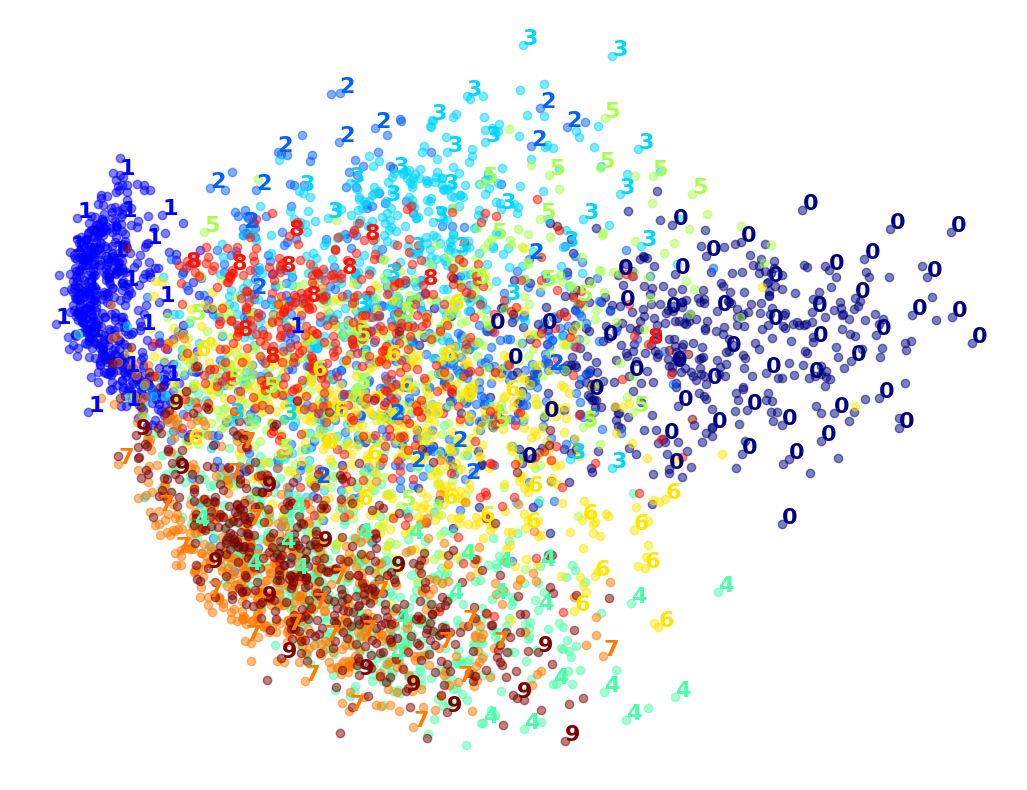

In [39]:
# Try using other dimensionality reduction algorithms such as PCA, LLE, or MDS and compare the resulting visualizations.
pca = PCA(n_components=2, random_state=42)
%time X_pca_reduced = pca.fit_transform(X_sample)
plot_digits(X_pca_reduced, y_sample)
plt.show()

"""Wow, PCA is blazingly fast! But although we do see a few clusters, there's way too much overlap. Let's try LLE:"""

CPU times: total: 6.75 s
Wall time: 3.2 s


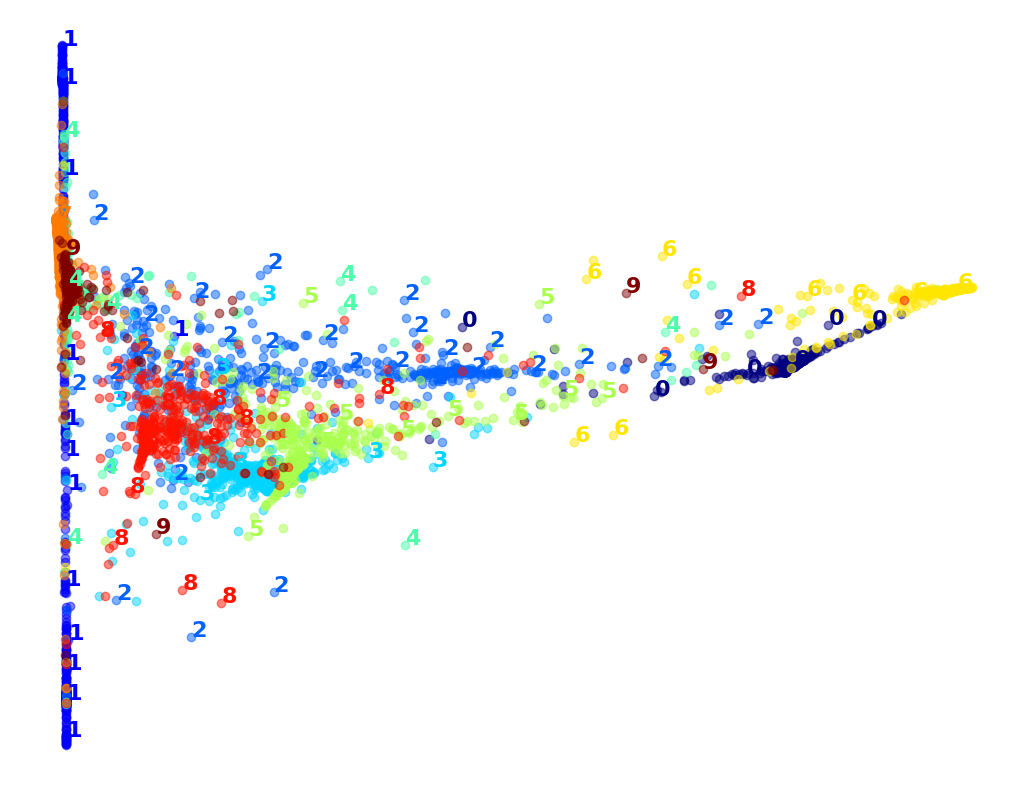

In [ ]:
from sklearn.manifold import LocallyLinearEmbedding
lle = LocallyLinearEmbedding(n_components=2, random_state=42)
%time X_lle_reduced = lle.fit_transform(X_sample)
plot_digits(X_lle_reduced, y_sample)
plt.show()

"""That took more time, and yet the result does not look good at all. Let's see what happens if we apply PCA first, preserving 95% of the variance:"""

CPU times: total: 15 s
Wall time: 3.99 s


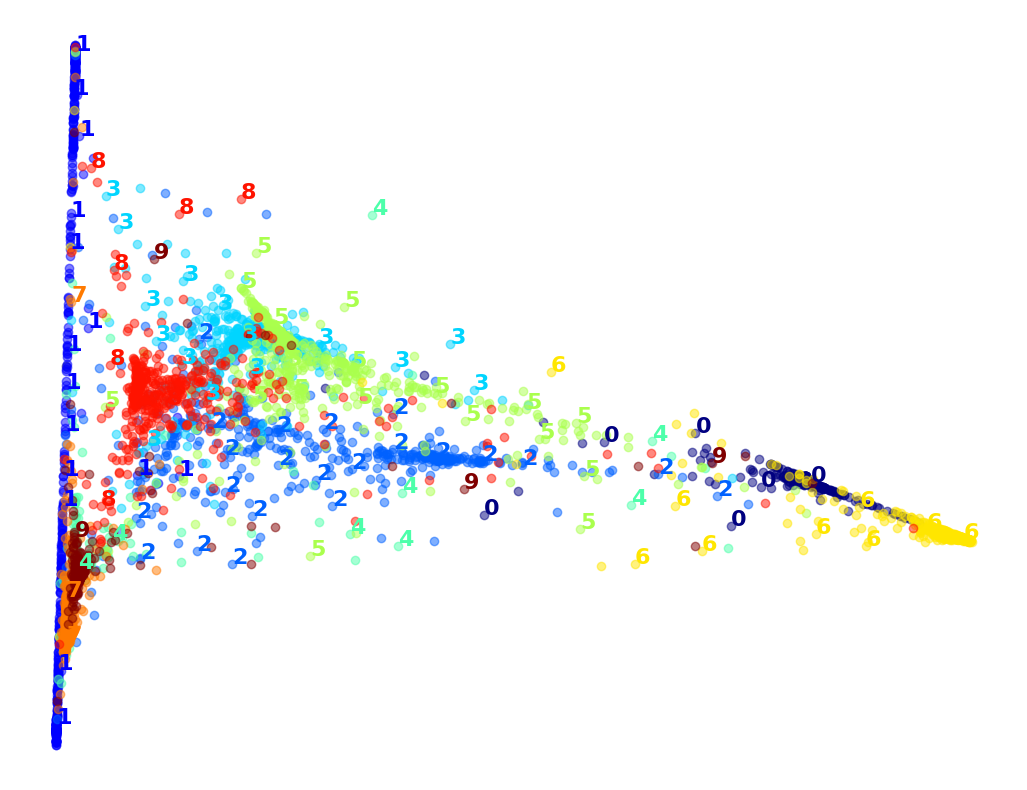

In [43]:
from sklearn.pipeline import make_pipeline
pca_lle = make_pipeline(PCA(n_components=0.95),
                        LocallyLinearEmbedding(n_components=2, random_state=42))

%time X_pca_lle_reduced = pca_lle.fit_transform(X_sample)
plot_digits(X_pca_lle_reduced, y_sample)
plt.show()

"""The result is more or less as bad, but this time training was a bit faster."""

In [ ]:
# MDS
"""**Warning**, the following cell will take about 10-30 minutes to run, depending on your hardware:"""
%time X_mds_reduced = MDS(n_components=2, normalized_stress=False, random_state=42).fit_transform(X_sample)
plot_digits(X_mds_reduced, y_sample)
plt.show()

"""Meh. This does not look great, all clusters overlap too much. Let's try with PCA first, perhaps it will be faster?"""

In [ ]:
# **Warning**, the following cell will take about 10-30 minutes to run, depending on your hardware:
pca_mds = make_pipeline(
    PCA(n_components=0.95, random_state=42),
    MDS(n_components=2, normalized_stress=False, random_state=42)
)

%time X_pca_mds_reduced = pca_mds.fit_transform(X_sample)
plot_digits(X_pca_mds_reduced, y_sample)
plt.show()

"""Same result, and not faster: PCA did not help in this case"""

CPU times: total: 8.92 s
Wall time: 1.94 s


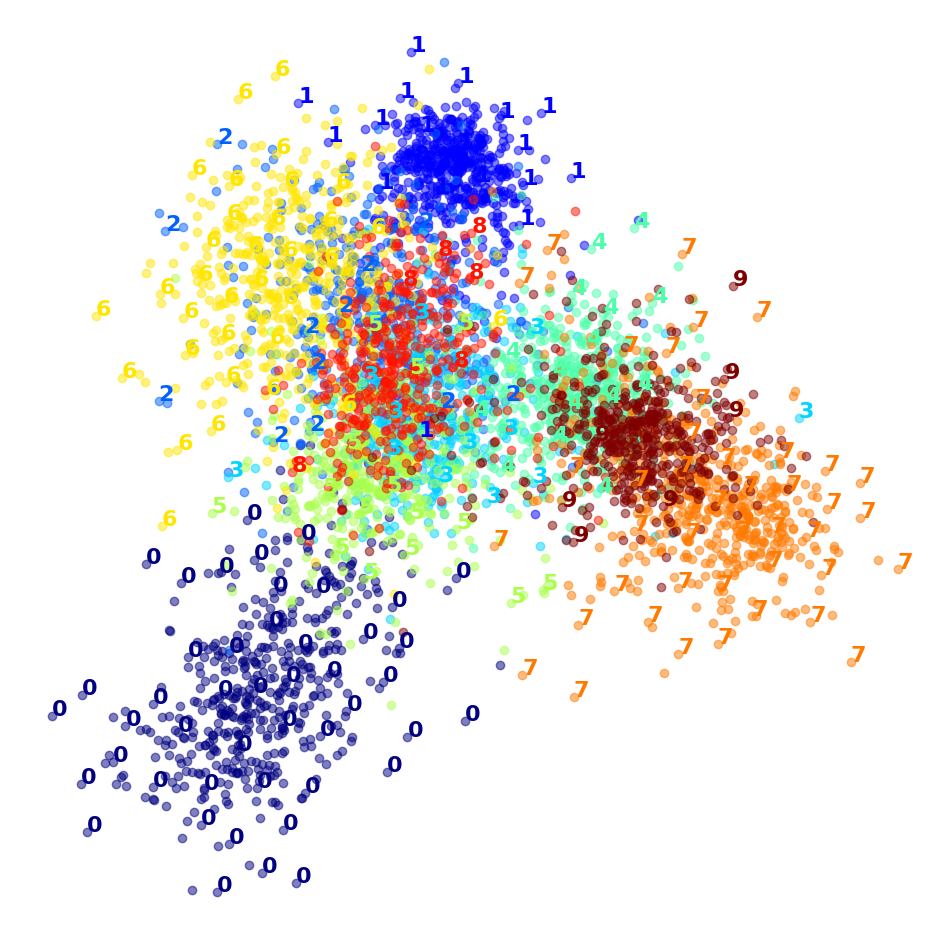

In [44]:
# LDA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

lda = LinearDiscriminantAnalysis(n_components=2)
%time X_lda_reduced = lda.fit_transform(X_sample, y_sample)
plot_digits(X_lda_reduced, y_sample, figsize=(12, 12))
plt.show()

"""
This one is very fast, and it looks nice at first, until you realize that several clusters overlap severely.
"""